In [6]:
import sympy as sp
from sympy.abc import t
import numpy as np
from matplotlib import pyplot as plt

In [7]:
# symbols and functions
g = sp.symbols('g')
m = sp.symbols('m')
R = sp.symbols('R')
Q1 = sp.Function('theta1')(t)
Q2 = sp.Function('theta2')(t)
Q3 = sp.Function('theta3')(t)

Q1d = Q1.diff(t)
Q1dd = Q1.diff(t, t)
Q2d = Q2.diff(t)
Q2dd = Q2.diff(t, t)
Q3d = Q3.diff(t)
Q3dd = Q3.diff(t, t)

x1 = R * sp.sin(Q1)
y1 = -1 * (R*sp.cos(Q1))

x2 = x1 + (R * sp.sin(Q1 + Q2))
y2 = y1 - (R * sp.cos(Q1 + Q2))

x3 = x2 + (R * sp.sin(Q1 + Q2 + Q3))
y3 = y2 - (R * sp.cos(Q1 + Q2 + Q3))

x1d = x1.diff(t)
y1d = y1.diff(t)

x2d = x2.diff(t)
y2d = y2.diff(t)

x3d = x3.diff(t)
y3d = y3.diff(t)

#kinetic energy:
KE1 = 0.5 * m * (x1d**2 + y1d**2)
KE2 = 0.5 * m * (x2d**2 + y2d**2)
KE3 = 0.5 * m * (x3d**2 + y3d**2)

#potential energy:
V1 = m * g * y1
V2 = m * g * y2
V3 = m * g * y3

#Lagrangian:
L = KE1 + KE2 + KE3 - V1 - V2 - V3

#Euler-Lagrange equations:
EL1 = (KE1 + KE2 + KE3 - V1 - V2 - V3).diff(Q1d, t) - (KE1 + KE2 + KE3 - V1 - V2 - V3).diff(Q1)
EL2 = (KE1 + KE2 + KE3 - V1 - V2 - V3).diff(Q2d, t) - (KE1 + KE2 + KE3 - V1 - V2 - V3).diff(Q2)
EL3 = (KE1 + KE2 + KE3 - V1 - V2 - V3).diff(Q3d, t) - (KE1 + KE2 + KE3 - V1 - V2 - V3).diff(Q3)

#Simplification
EL1 = sp.simplify(EL1)
EL2 = sp.simplify(EL2)
EL3 = sp.simplify(EL3)

#Solve the equatioins for d2(theta_i)/dt^2
Matrix_Equations = sp.Matrix([EL1, EL2, EL3])
Thetas = sp.Matrix([Q1dd, Q2dd, Q3dd])
solution = sp.solve(Matrix_Equations, Thetas)

#Substitute the constants with values:
sub1 = solution[Q1dd].subs({g: 9.81, R: 1, m: 1})
sub2 = solution[Q2dd].subs({g: 9.81, R: 1, m: 1})
sub3 = solution[Q3dd].subs({g: 9.81, R: 1, m: 1})

#Create numeric functions to pass to the calculator:
Q1dd_comp = sp.lambdify([Q1, Q1d, Q2, Q2d, Q3, Q3d], sub1)
Q2dd_comp = sp.lambdify([Q1, Q1d, Q2, Q2d, Q3, Q3d], sub2)
Q3dd_comp = sp.lambdify([Q1, Q1d, Q2, Q2d, Q3, Q3d], sub3)


Now let's perform calculations for our chosen timespan and plot the result as points on the graph:

In [30]:
def compute(Qs, Qds, calc_1, calc_2, calc_3, dt):
    '''
    Qs, Qds are a current condition of the system, defined by
    Q1, Q1d, Q2, Q2d, Q3, Q3d
    '''
    Q1 = Qs[0]
    Q1d = Qds[0]
    Q2 = Qs[1]
    Q2d = Qds[1]
    Q3 = Qs[2]
    Q3d = Qds[2]

    Q1dd = calc_1(Q1, Q1d, Q2, Q2d, Q3, Q3d)
    Q2dd = calc_2(Q1, Q1d, Q2, Q2d, Q3, Q3d)
    Q3dd = calc_3(Q1, Q1d, Q2, Q2d, Q3, Q3d)

    dQ1d = Q1dd*dt
    dQ2d = Q2dd*dt
    dQ3d = Q3dd*dt

    Q1d_new = Q1d + dQ1d
    Q2d_new = Q2d + dQ2d
    Q3d_new = Q3d + dQ3d

    dQ1 = Q1d_new*dt
    dQ2 = Q2d_new*dt
    dQ3 = Q3d_new*dt

    Q1_new = Q1 + dQ1
    Q2_new = Q2 + dQ2
    Q3_new = Q3 + dQ3

    return Q1_new, Q1d_new, Q2_new, Q2d_new, Q3_new, Q3d_new

def to_cartesian(Q1, Q2, Q3, R):
    x1 = R*np.cos(Q1)
    y1 = -R*np.sin(Q1)

    x2 = x1 + R*np.cos(Q1 + Q2)
    y2 = y1 - R*np.sin(Q1 + Q2)

    x3 = x2 + R*np.cos(Q1 + Q2 + Q3)
    y3 = y2 - R*np.sin(Q1 + Q2 + Q3)

    return x1, y1, x2, y2, x3, y3

In [105]:
#R = 1
R = 1

#Time resolution to integrate (in seconds):
dt = 0.05

#Initial thetas (in radians):
Qs = np.array([np.pi/2, -np.pi/4, 0])

#Initial angular speeds (in radians/sec):
Qds = np.array([0, 0, 0])


T = np.arange(0, 250, dt)

X1 = np.zeros(len(T))
Y1 = np.zeros(len(T))
X2 = np.zeros(len(T))
Y2 = np.zeros(len(T))
X3 = np.zeros(len(T))
Y3 = np.zeros(len(T))

#Initial conditions:
x1, y1, x2, y2, x3, y3 = to_cartesian(Qs[0], Qs[1], Qs[2], R)

for i in range(0, len(T)):
    Q1, Q1d, Q2, Q2d, Q3, Q3d = compute(
                                    Qs, Qds,
                                    Q1dd_comp, Q2dd_comp, Q3dd_comp,
                                    dt
                                    )
    Qs[0] = Q1; Qs[1] = Q2; Qs[2] = Q3
    Qds[0] = Q1d; Qds[1] = Q2d; Qds[2] = Q3d

    x1, y1, x2, y2, x3, y3 = to_cartesian(Q1, Q2, Q3, R)

    X1[i] = x1
    X2[i] = x2
    X3[i] = x3
    Y1[i] = y1
    Y2[i] = y2
    Y3[i] = y3



([<matplotlib.axis.YTick at 0x2929a1755c8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

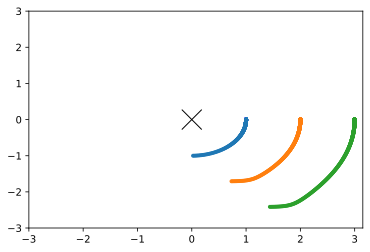

In [106]:
%config InlineBackend.figure_format = 'svg'

plt.plot([0], [0], lw=0, marker='x', markersize=20, color='black')
plt.plot(X1, Y1, lw=0.1, marker='.')
plt.plot(X2, Y2, lw=0.1, marker='.')
plt.plot(X3, Y3, lw=0.1, marker='.')
plt.xticks(np.arange(-3, 3.1, 1))
plt.yticks(np.arange(-3, 3.1, 1))